**Visualisasi Data Kelompok 3**

Hafizh Raihan Kurnia Putra 	: 205150207111005

Muhammad Rusydi Hanan 	: 205150207111015

Ja'far Shidqul Azzam 		: 205150201111006


<b>Link Dataset Adalah Sebagai Berikut</b><br>
https://www.kaggle.com/code/sujithmandala/mental-health-analysis-nlp/input

<h1><b>Capstone 3</b></h1>

<h1>Goal Project Ini</h1>
Mampu Memvisualisasikan Teks pada Dataset Menggunakan Word Cloud, Sentiment Analysis, dll dan melakukan visualisasi hasil klasifikasi dari algoritma KNN dan Logistic Regression.

In [ ]:
# Import Library
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import time

In [ ]:
# Import Dataset From GDrive
# from google.colab import drive
# drive.mount('/content/drive')
# df1 = pd.read_csv('/content/drive/My Drive/Capstone 3 VD/mental_health.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Dataset From uploaded file
df1 = pd.read_csv('/content/mental_health.csv')

In [ ]:
df1.head(10)

text  label
0  dear american teens question dutch person hear...      0
1  nothing look forward lifei dont many reasons k...      1
2  music recommendations im looking expand playli...      0
3  im done trying feel betterthe reason im still ...      1
4  worried  year old girl subject domestic physic...      1
5  hey rredflag sure right place post this goes  ...      1
6  feel like someone needs hear tonight feeling r...      0
7  deserve liveif died right noone would carei re...      1
8  feels good ive set dateim killing friday nice ...      1
9  live guiltok made stupid random choice  its ge...      1

<b>Mengatasi Nilai Null dan Duplikat</b>

In [ ]:
print("Apakah ada nilai null? \n",df1.isna().any(),"\n")
print("Ada berapa jumlah baris pada data? ",df1.shape[0],"\n")
print("Ada berapa jumlah atribut pada data? ",df1.shape[1],"\n")
print("Jumlah baris data yang duplikat? ",df1.shape[0]-df1['text'].nunique()," baris duplikat")

Apakah ada nilai null? 
 text     False
label    False
dtype: bool 

Ada berapa jumlah baris pada data?  27977 

Ada berapa jumlah atribut pada data?  2 

Jumlah baris data yang duplikat?  5  baris duplikat


In [ ]:
#pembersihan data duplikat
df = df1.drop_duplicates(subset='text',keep="first")

In [ ]:
#mencari ukuran baris dan kolom dari dataset setelah pembersihan duplikat
df.shape

(27972, 2)

In [ ]:
# Dilakukan reset index karena terdapat data yang terhapus agar index tetap terurut
df  = df.reset_index()

<b>Proses Data Cleaning</b>

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# Membuat fungsi untuk preprocessing
stop_words = set(stopwords.words('english'))
additional_stopwords = ['im', 'cant', 'dont']
def clean_text(text):
    # menghilangkan HTML tags
    text = re.sub('<.*?>', '', text)
    # menghilangkan karakter non-alpabet dan mengubah semua jadi lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # proses tokenisasi
    words = nltk.word_tokenize(text)
    # menghilangkan stopwords
    words = [w for w in words if w not in stop_words]
    # menghilangkan imbuhan pada kata
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    # menggabungkan kata kata kembali menjadi string
    text = ' '.join(words)
    return text

In [ ]:
%%time
# Penerapan fungsi preprocessing pada data

tqdm.pandas()

df['cleaned_text'] = df['text'].progress_apply(clean_text)
df['cleaned_text']

  0%|          | 0/27972 [00:00<?, ?it/s]

CPU times: user 47.2 s, sys: 251 ms, total: 47.4 s
Wall time: 48.5 s


0        dear american teen question dutch person heard...
1        noth look forward lifei dont mani reason keep ...
2        music recommend im look expand playlist usual ...
3        im done tri feel betterth reason im still aliv...
4        worri year old girl subject domest physicalmen...
                               ...                        
27967    post everyday peopl stop care religion matter ...
27968    okay definetli need hear guy opinion ive prett...
27969    cant get dog think ill kill myselfth last thin...
27970    what point princess bridei realli think like w...
27971    got nude person might might know snapchat ok c...
Name: cleaned_text, Length: 27972, dtype: object

In [ ]:
df.to_csv('dataset_after_preprocessing.csv', index=False)

<h1><b>Capstone 4</b></h1>

**Visualisasi Data Kelompok 3**

Hafizh Raihan Kurnia Putra 	: 205150207111005 (Model 1 + Penjelasan)

Muhammad Rusydi Hanan 	: 205150207111015 (Model 2) + Penjelasan

Ja'far Shidqul Azzam 		: 205150201111006 (Confusion Matrix & Penjelasan)


<h3><b>Exploratory Data Analysis (EDA)</b></h3>

<b>Memeriksa Distribusi Kelas</b>

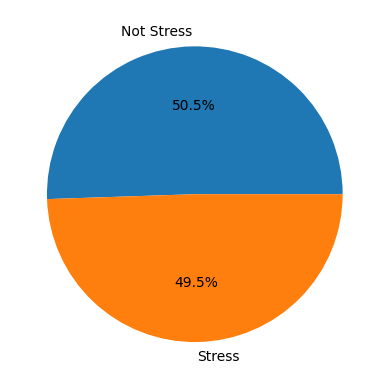

In [ ]:
def ratings(rating):
    if rating==1:
        return "Stress"
    if rating==0:
        return "Not Stress"

dfcopy = df.copy()
dfcopy['label'] = dfcopy['label'].apply(ratings)


plt.pie(dfcopy['label'].value_counts(), labels=dfcopy['label'].unique().tolist(), autopct='%1.1f%%')
plt.show()
plt.close()

Barchart diatas, menampilkan distribusi label kelaas yang terdapat dalam dataset. Dari visual yang ditampilkan pada barchart diatas, terlihat bahwa label kelas 0 (tidak stress) memiliki frekuensi yang lebih banyak dibandingkan label kelas 1 (stress). Label kelas 1 memiliki persentase jumlah tweet sebanyak 49.5%, sedangkan label kelas 0 memiliki persentase jumlah tweet sebanyak 50.5%. Perbedaan 1% tersebut terlihat tidak signifikan, tapi jika dilihat dari banyaknya jumlah tweet yang mencapai 27 ribu data lebih maka selisih 1% bisa saja dianggap signifikan.


<b>Visualisasi kata dengan Word Cloud</b>

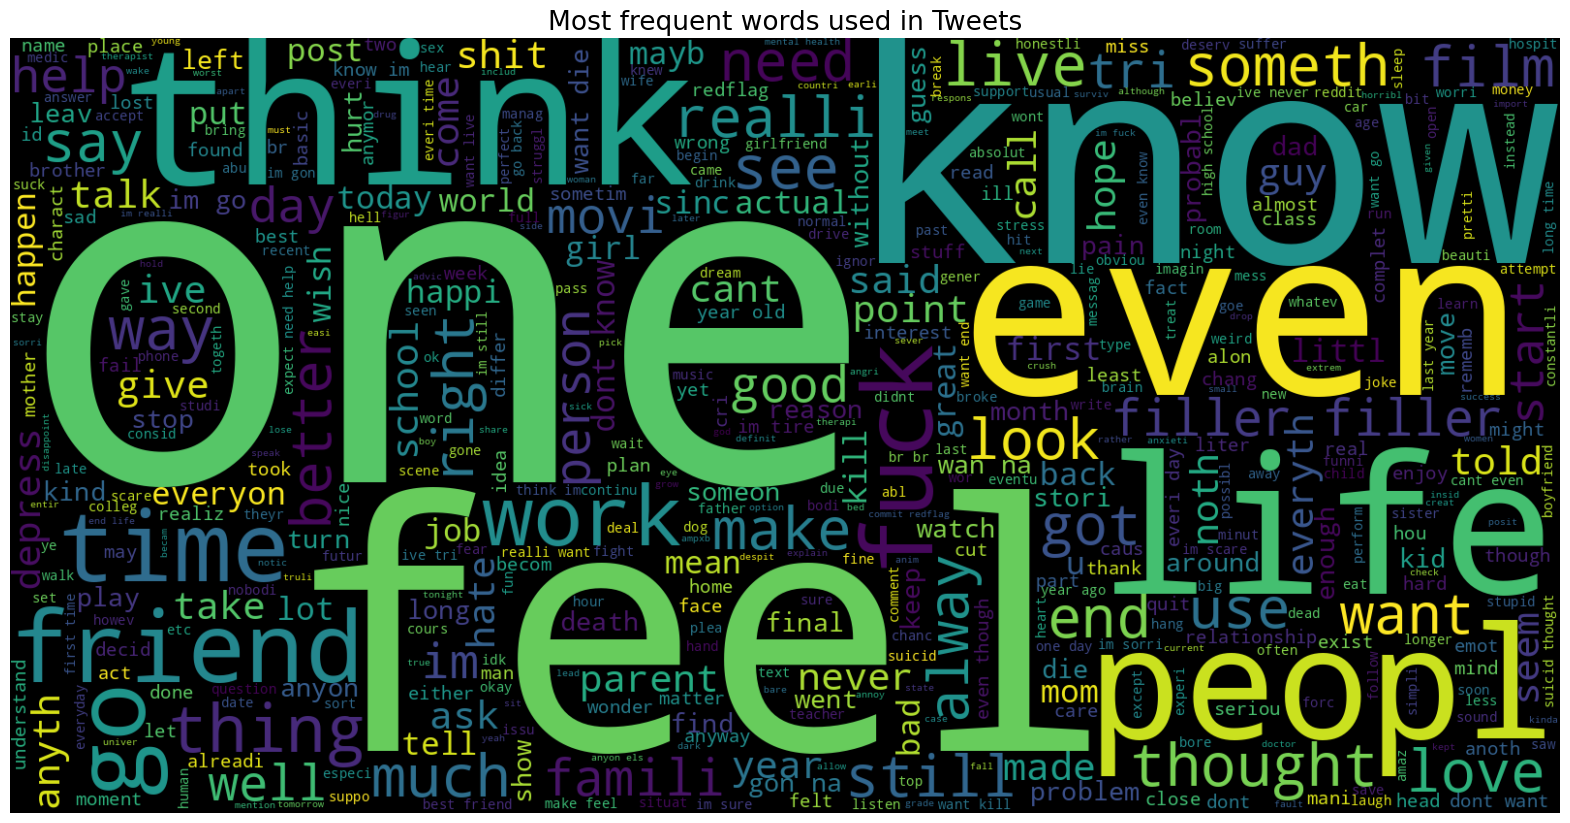

In [ ]:
from wordcloud import WordCloud

text = ' '.join([word for word in df['cleaned_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words used in Tweets', fontsize=19)
plt.show()

Visualisasi diatas merupakan grafik representasi frekuensi kata yang paling banyak digunakan dalam dataset. Frekuensi kata tersebut direpresentasikan menggunakan wordcloud. Dalam wordcloud, semakin besar ukuran satu kata yang ditampilkan, akan merepresentasikan jumlah frekuensi kemunculan kata dalam dataset tersebut. Dalam dataset yang digunakan dalam kasus ini, kata one memiliki frekuensi terbanyak, sehingga ukuran kata one merupakan yang terbesar dalam wordcloud diatas. Hal itu juga berlaku sebaliknya, semakin kecil kata yang ditampilkan pada wordcloud dibandingkan dengan kata yang lain, maka kata tersebut memiliki frekuensi yang lebih sedikit. Dalam kasus ini, kata yang ditampilkan dalam visualisasi wordcloud ini dibatasi hanya 500 kata.


In [ ]:
# split df - positive and negative sentiment:
df_negative = df[df['label'] == 1]
df_positive = df[df['label'] == 0]

In [ ]:
# Create Word Cloud for Non-Stress
text_pos = ' '.join([word for word in df_positive['cleaned_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud_pos = WordCloud(max_words=500, width=1600, height=800).generate(text_pos)

# Create Word Cloud for Stress
text_neg = ' '.join([word for word in df_negative['cleaned_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud_negative = WordCloud(max_words=500, width=1600, height=800).generate(text_neg)

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

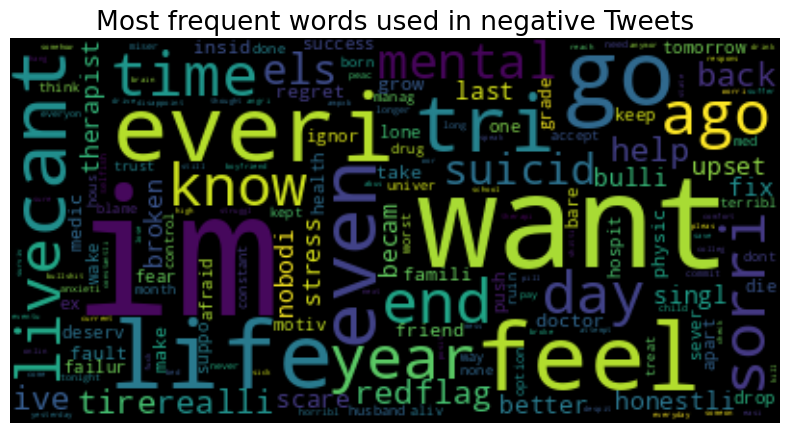

In [ ]:
# Show WordCloud For stress
set1 = set(wordcloud_pos.words_)
set2 = set(wordcloud_negative.words_)

negative = set2 - set1
wordcloud_neg_only = WordCloud().generate_from_text(" ".join(negative))

# Display the resulting wordcloud
plt.figure(figsize=(10,5), facecolor='None')
plt.imshow(wordcloud_neg_only, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words used in negative Tweets', fontsize=19)
plt.show()

In [ ]:
df_negative.head()

index                                               text  label  \
1      1  nothing look forward lifei dont many reasons k...      1   
3      3  im done trying feel betterthe reason im still ...      1   
4      4  worried  year old girl subject domestic physic...      1   
5      5  hey rredflag sure right place post this goes  ...      1   
7      7  deserve liveif died right noone would carei re...      1   

                                        cleaned_text  
1  noth look forward lifei dont mani reason keep ...  
3  im done tri feel betterth reason im still aliv...  
4  worri year old girl subject domest physicalmen...  
5  hey rredflag sure right place post goe im curr...  
7  deserv liveif die right noon would carei real ...

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download stopwords jika belum diunduh
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
additional_stopwords = ['im', 'cant', 'dont']
stop_words.update(additional_stopwords)
# Mengidentifikasi kata-kata yang bukan stopwords dan kata benda
nouns = []
adjectives = []
verbs = []
for index, row in df_negative.iterrows():
    text = row['cleaned_text']
    tokens = word_tokenize(text)

    for token in tokens:
        if token.lower() not in stop_words and nltk.pos_tag([token])[0][1] == 'NN':
            nouns.append(token)
        if token.lower() not in stop_words and nltk.pos_tag([token])[0][1] == 'JJ':
          adjectives.append(token)
        if token.lower() not in stop_words and nltk.pos_tag([token])[0][1] == 'VB':
          verbs.append(token)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


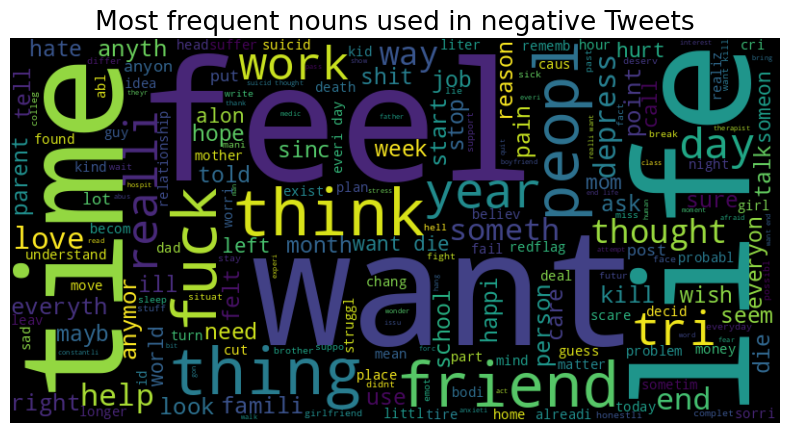

In [ ]:
# Menggabungkan kata-kata menjadi string
nouns_text = " ".join(nouns)

# Membuat WordCloud dari kata-kata benda
wordcloud = WordCloud(width=800, height=400).generate(nouns_text)

# Menampilkan WordCloud
plt.figure(figsize=(10,5), facecolor='None')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent nouns used in negative Tweets', fontsize=19)
plt.show()

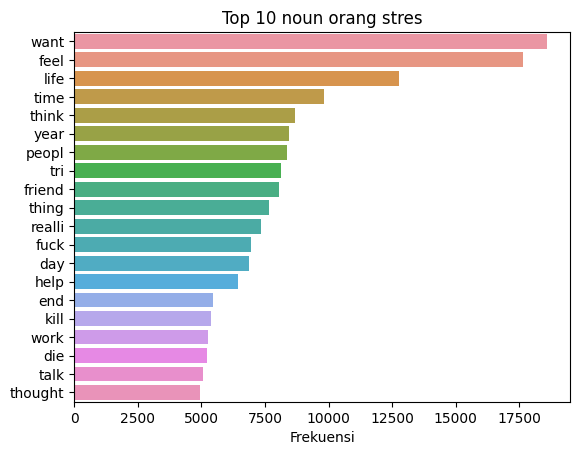

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from nltk import FreqDist
from nltk.tokenize import word_tokenize
token_1 = word_tokenize(nouns_text)
fdist = FreqDist(token_1)
dfTop = pd.DataFrame.from_dict(fdist, orient='index', columns=['Frekuensi'])
dfTop = dfTop.sort_values('Frekuensi', ascending=False)  # Urutkan berdasarkan frekuensi
df_top_10 = dfTop.head(20)
# plt.figure(figsize=(10, 6))  # Atur ukuran plot sesuai kebutuhan Anda
# plt.bar(df_top_10.index, df_top_10['Frekuensi'])
# plt.xlabel('Kata-kata')
# plt.ylabel('Frekuensi')
# plt.title('Bar Plot dari Teks (Top 10)')
# plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar tidak tumpang tindih
# plt.show()
sns.barplot(x=df_top_10['Frekuensi'], y=df_top_10.index)
plt.title('Top 10 noun orang stres')
plt.show()

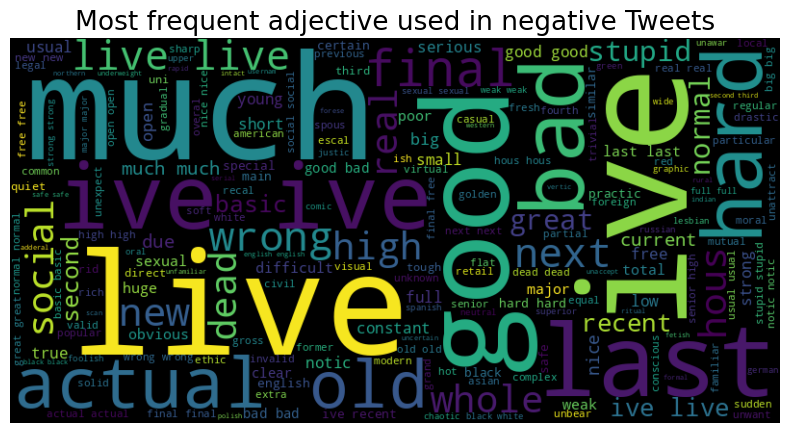

In [ ]:
# Menggabungkan kata-kata menjadi string
adj_text = " ".join(adjectives)

# Membuat WordCloud dari kata-kata benda
wordcloud = WordCloud(width=800, height=400).generate(adj_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent adjective used in negative Tweets', fontsize=19)
plt.show()

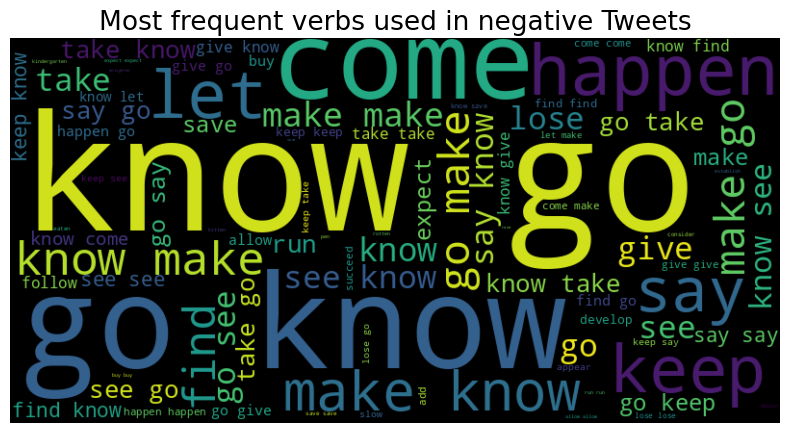

In [ ]:
# Menggabungkan kata-kata menjadi string
verbs_text = " ".join(verbs)

# Membuat WordCloud dari kata-kata benda
wordcloud = WordCloud(width=800, height=400).generate(verbs_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent verbs used in negative Tweets', fontsize=19)
plt.show()

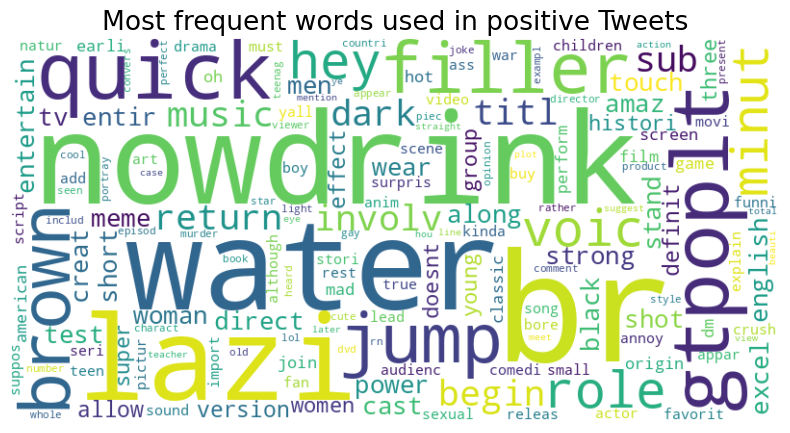

In [ ]:
# Show WordCloud For Non-Stress
pos = set1 - set2
wordcloud_pos_only = WordCloud(width=800, height=400, background_color='white').generate_from_text(" ".join(pos))

# Display the resulting wordcloud
plt.figure(figsize=(10,5), facecolor='None')
plt.imshow(wordcloud_pos_only, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words used in positive Tweets', fontsize=19)
plt.show()

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download stopwords jika belum diunduh
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
additional_stopwords = ['im', 'cant', 'dont']
stop_words.update(additional_stopwords)
# Mengidentifikasi kata-kata yang bukan stopwords dan kata benda
nouns = []
adjectives = []
verbs = []
for index, row in df_positive.iterrows():
    text = row['cleaned_text']
    tokens = word_tokenize(text)

    for token in tokens:
        if token.lower() not in stop_words and nltk.pos_tag([token])[0][1] == 'NN':
            nouns.append(token)
        if token.lower() not in stop_words and nltk.pos_tag([token])[0][1] == 'JJ':
          adjectives.append(token)
        if token.lower() not in stop_words and nltk.pos_tag([token])[0][1] == 'VB':
          verbs.append(token)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


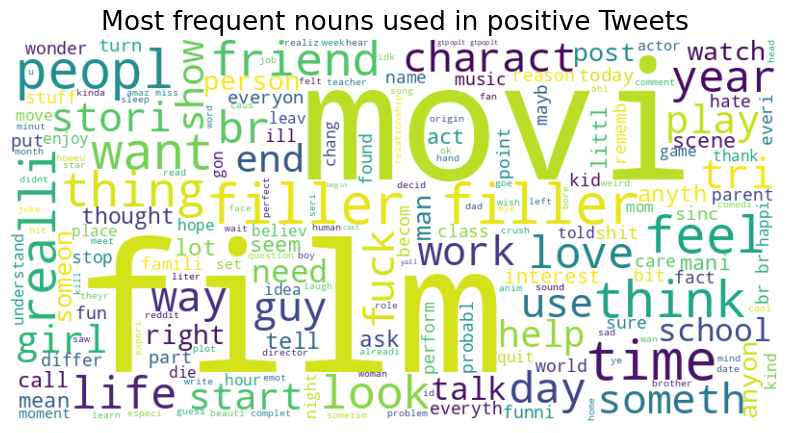

In [ ]:
# Menggabungkan kata-kata menjadi string
nouns_text = " ".join(nouns)

# Membuat WordCloud dari kata-kata benda
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(nouns_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent nouns used in positive Tweets', fontsize=19)
plt.show()

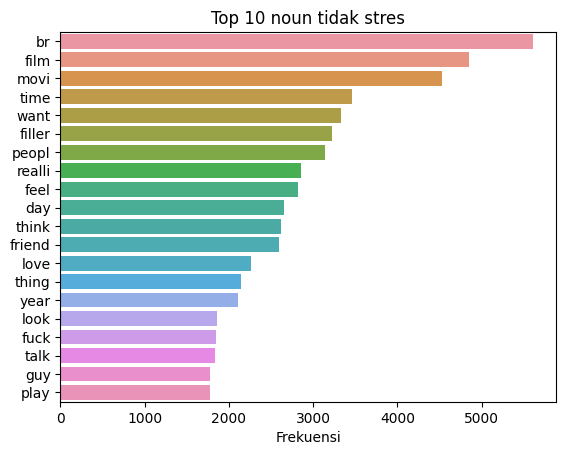

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from nltk import FreqDist
from nltk.tokenize import word_tokenize
token_1 = word_tokenize(nouns_text)
fdist = FreqDist(token_1)
dfTop = pd.DataFrame.from_dict(fdist, orient='index', columns=['Frekuensi'])
dfTop = dfTop.sort_values('Frekuensi', ascending=False)  # Urutkan berdasarkan frekuensi
df_top_10 = dfTop.head(20)
# plt.figure(figsize=(10, 6))  # Atur ukuran plot sesuai kebutuhan Anda
# plt.bar(df_top_10.index, df_top_10['Frekuensi'])
# plt.xlabel('Kata-kata')
# plt.ylabel('Frekuensi')
# plt.title('Bar Plot dari Teks (Top 10)')
# plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar tidak tumpang tindih
# plt.show()
sns.barplot(x=df_top_10['Frekuensi'], y=df_top_10.index)
plt.title('Top 10 noun tidak stres')
plt.show()

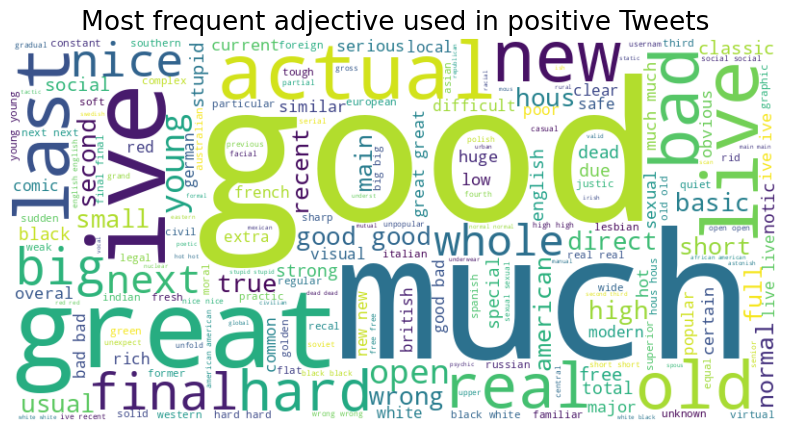

In [ ]:
# Menggabungkan kata-kata menjadi string
adj_text = " ".join(adjectives)

# Membuat WordCloud dari kata-kata benda
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(adj_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent adjective used in positive Tweets', fontsize=19)
plt.show()

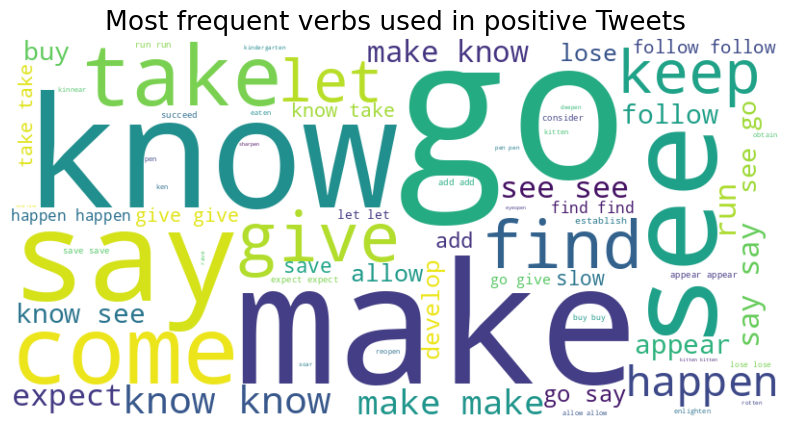

In [ ]:
# Menggabungkan kata-kata menjadi string
verbs_text = " ".join(verbs)

# Membuat WordCloud dari kata-kata benda
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(verbs_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent verbs used in positive Tweets', fontsize=19)
plt.show()

<b>Sentiment Analysis</b>

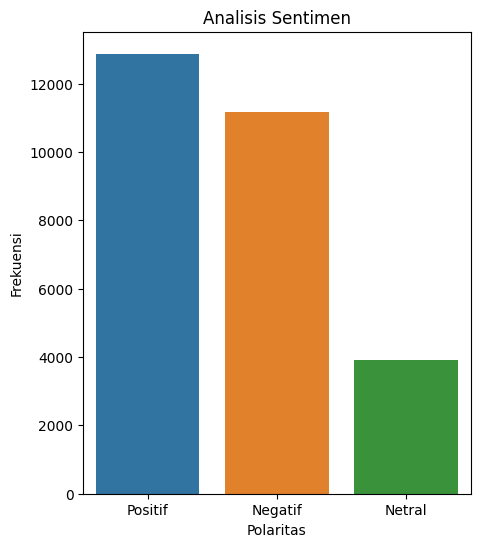

In [ ]:
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt


df_sents = df
# Menganalisis sentimen untuk setiap teks dalam dataset
sentiments = []
for text in df_sents['cleaned_text']:
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        sentiment = "Positif"
    elif sentiment_score < 0:
        sentiment = "Negatif"
    else:
        sentiment = "Netral"
    sentiments.append(sentiment)

# Menambahkan kolom sentimen ke dalam dataset
df_sents['Sentimen'] = sentiments

# creating the bar plot
value_counts = df_sents['Sentimen'].value_counts()
plt.figure(figsize=(5, 6))
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.title('Analisis Sentimen')
plt.xlabel('Polaritas')
plt.ylabel('Frekuensi')
plt.show()

Disini kita mengelompokkan hasil analisis sentimen data dalam 3 kategori yaitu positif, negatif, dan netral. Dalam visualisasi dapat kita lihat bahwa data yang teksnya bernilai positif atau bisa dibilang baik berjumlah 12000 lebih. Untuk teks yang bernilai negatif atau kurang baik berjumlah sekitar 10000. Sedangkan untuk yang teks yang bersifat netral terdapat sekittar 4000 record.

**Analisis Topik**

Analisis topik dilakukan dengan bantuan LDA (Latent Dirichlet Allocation)

In [ ]:
from gensim import corpora, models
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Persiapan Data
tokens = [[word for word in sentence.split()] for sentence in df['cleaned_text']]


# Pembentukan Representasi Dokumen
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(doc) for doc in tokens]

# Pelatihan Model Topik
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

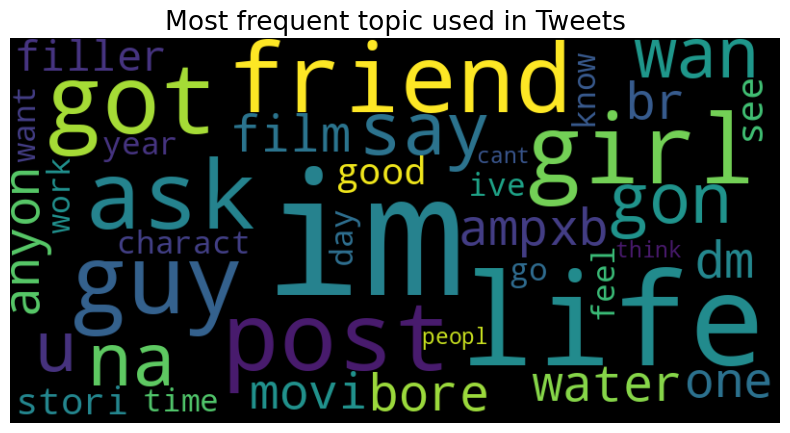

In [ ]:
# Visualisasi
# Buat visualisasi hasil analisis topik menggunakan pustaka matplotlib dan wordcloud

# Mendapatkan kata-kata yang paling sering muncul dalam setiap topik
topics = lda_model.show_topics(num_topics=5, num_words=10, formatted=False)
topic_words = [[word[0] for word in topic[1]] for topic in topics]

# Menggabungkan kata-kata dalam setiap topik menjadi satu teks
text = ' '.join([word for topic in topic_words for word in topic])

# Membuat word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Menampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent topic used in Tweets', fontsize=19)
plt.show()


Analisis Topik dilakukan untuk mendapatkan pengetahuan terkait topik-topik yang ada dalam teks. Penerapan analisis topik disini sendiri digunakan untuk mendapatkan topik-topik tweet yang bisa jadi penyebab stress seseorang. Dapat kita lihat dalam visualisasi yang berbentuk wordcloud, terdapat beberpaa persoalan seperti orang, teman, kehidupan, perempuan, pekerjaan, film, permainan, gay, perempuan, laki-laki, waktu, dan beberapa penyebab lainnya.

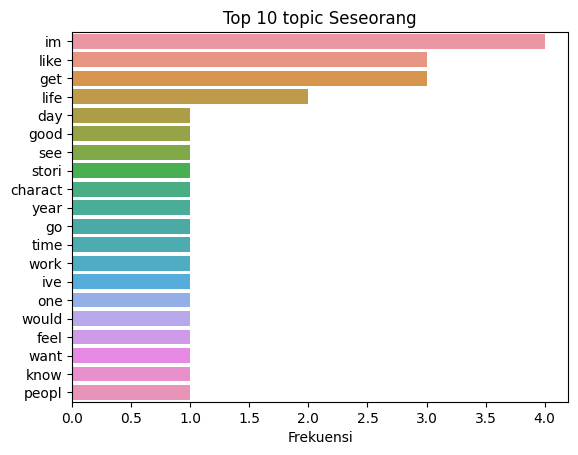

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from nltk import FreqDist
from nltk.tokenize import word_tokenize
token_1 = word_tokenize(text)
fdist = FreqDist(token_1)
dfTop = pd.DataFrame.from_dict(fdist, orient='index', columns=['Frekuensi'])
dfTop = dfTop.sort_values('Frekuensi', ascending=False)  # Urutkan berdasarkan frekuensi
df_top_10 = dfTop.head(20)
# plt.figure(figsize=(10, 6))  # Atur ukuran plot sesuai kebutuhan Anda
# plt.bar(df_top_10.index, df_top_10['Frekuensi'])
# plt.xlabel('Kata-kata')
# plt.ylabel('Frekuensi')
# plt.title('Bar Plot dari Teks (Top 10)')
# plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar tidak tumpang tindih
# plt.show()
sns.barplot(x=df_top_10['Frekuensi'], y=df_top_10.index)
plt.title('Top 10 topic Seseorang')
plt.show()

In [ ]:
from gensim import corpora, models
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Persiapan Data
tokens = [[word for word in sentence.split()] for sentence in df_negative['cleaned_text']]


# Pembentukan Representasi Dokumen
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(doc) for doc in tokens]

# Pelatihan Model Topik
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

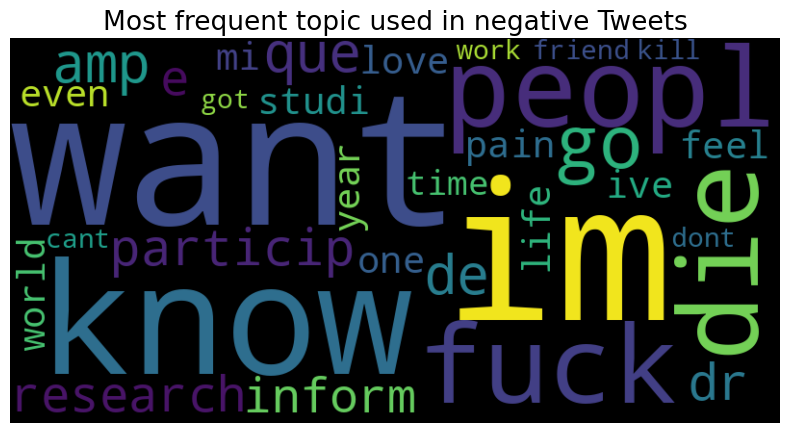

In [ ]:
# Visualisasi
# Buat visualisasi hasil analisis topik menggunakan pustaka matplotlib dan wordcloud

# Mendapatkan kata-kata yang paling sering muncul dalam setiap topik
topics = lda_model.show_topics(num_topics=5, num_words=10, formatted=False)
topic_words = [[word[0] for word in topic[1]] for topic in topics]

# Menggabungkan kata-kata dalam setiap topik menjadi satu teks
text = ' '.join([word for topic in topic_words for word in topic])

# Membuat word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Menampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent topic used in negative Tweets', fontsize=19)
plt.show()


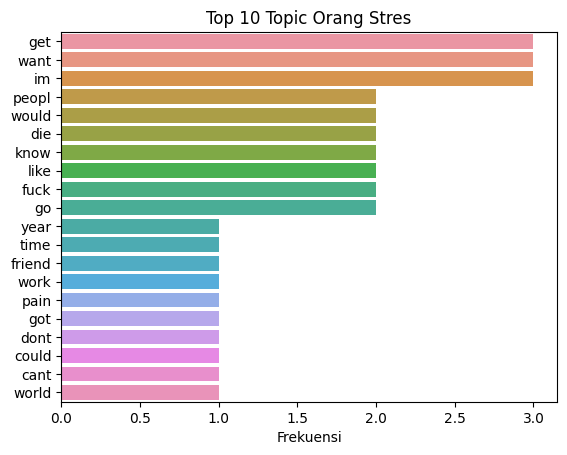

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from nltk import FreqDist
from nltk.tokenize import word_tokenize
token_1 = word_tokenize(text)
fdist = FreqDist(token_1)
dfTop = pd.DataFrame.from_dict(fdist, orient='index', columns=['Frekuensi'])
dfTop = dfTop.sort_values('Frekuensi', ascending=False)  # Urutkan berdasarkan frekuensi
df_top_10 = dfTop.head(20)
# plt.figure(figsize=(10, 6))  # Atur ukuran plot sesuai kebutuhan Anda
# plt.bar(df_top_10.index, df_top_10['Frekuensi'])
# plt.xlabel('Kata-kata')
# plt.ylabel('Frekuensi')
# plt.title('Bar Plot dari Teks (Top 10)')
# plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar tidak tumpang tindih
# plt.show()
sns.barplot(x=df_top_10['Frekuensi'], y=df_top_10.index)
plt.title('Top 10 Topic Orang Stres')
plt.show()

Menampilkan topik-topik pada data negative

In [ ]:
from gensim import corpora, models
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Persiapan Data
tokens = [[word for word in sentence.split()] for sentence in df_positive['cleaned_text']]


# Pembentukan Representasi Dokumen
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(doc) for doc in tokens]

# Pelatihan Model Topik
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

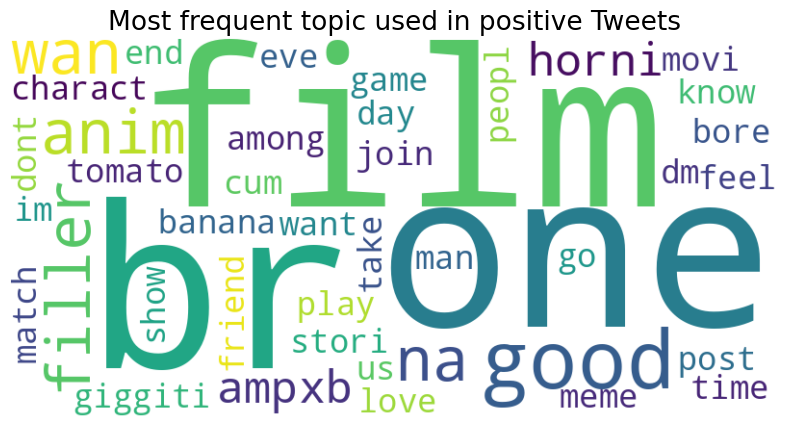

In [ ]:
# Visualisasi
# Buat visualisasi hasil analisis topik menggunakan pustaka matplotlib dan wordcloud

# Mendapatkan kata-kata yang paling sering muncul dalam setiap topik
topics = lda_model.show_topics(num_topics=5, num_words=10, formatted=False)
topic_words = [[word[0] for word in topic[1]] for topic in topics]

# Menggabungkan kata-kata dalam setiap topik menjadi satu teks
text = ' '.join([word for topic in topic_words for word in topic])

# Membuat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent topic used in positive Tweets', fontsize=19)
plt.show()


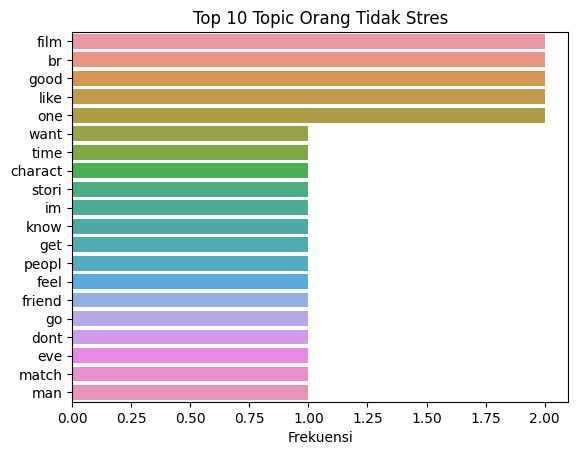

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from nltk import FreqDist
from nltk.tokenize import word_tokenize
token_1 = word_tokenize(text)
fdist = FreqDist(token_1)
dfTop = pd.DataFrame.from_dict(fdist, orient='index', columns=['Frekuensi'])
dfTop = dfTop.sort_values('Frekuensi', ascending=False)  # Urutkan berdasarkan frekuensi
df_top_10 = dfTop.head(20)
# plt.figure(figsize=(10, 6))  # Atur ukuran plot sesuai kebutuhan Anda
# plt.bar(df_top_10.index, df_top_10['Frekuensi'])
# plt.xlabel('Kata-kata')
# plt.ylabel('Frekuensi')
# plt.title('Bar Plot dari Teks (Top 10)')
# plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar tidak tumpang tindih
# plt.show()
sns.barplot(x=df_top_10['Frekuensi'], y=df_top_10.index)
plt.title('Top 10 Topic Orang Tidak Stres')
plt.show()

Menampilkan topik-topik pada data positive

<b>Term Frequency Analysis</b>

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27972/27972 [00:00<00:00, 226364.38it/s]

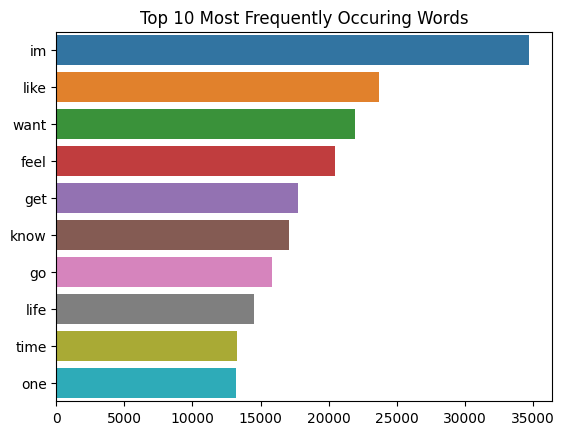

In [ ]:
from collections import Counter
from tqdm import trange
import seaborn as sns

# Membuat copy dataset agar data asli aman dari perubahan
dfcopy = df.copy()

def corpus(text):
    text_list = text.split()
    return text_list

dfcopy['review'] = dfcopy['cleaned_text'].apply(corpus)

# Membuat List yang berisi kumpulan kata-kata dalam dataset
corpus = []

for i in trange(dfcopy.shape[0], ncols=1000, nrows=10, colour='green', smoothing=0.8):
  corpus += dfcopy['review'][i]

# Mencari 10 kata yang paling sering muncul
len(corpus)
mostCommon = Counter(corpus).most_common(10)

words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

# Visualisasi
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

# <h3><b>Modelling (With Cross Validation)</b></h3>

Tentukan 2 model/algoritma yang sesuai dengan pola dan karakteristik data (Sertakan juga alasan memilih model-model tersebut). Gunakan K-Fold Cross Validation Untuk Melihat Perbandingan 2 Model Tersebut (Accuracy, Precision, Recall, F1_Score, dan Confussion Matrix)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X = df['cleaned_text'].values
y = df['label'].values

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Vectorize Data
vect = TfidfVectorizer(ngram_range=(1,2), max_features=1000, stop_words="english")
X_train_dtm = vect.fit_transform(X_train) # Mencari Mean & Variance dari Train lalu Transform Berdasarkan Kedua Hal Itu
X_test_dtm = vect.transform(X_test) # Transform Test Menggunakan Mean & Variance dari Train

## Model LogisticRegression

Model Logistic Regression digunakan karena model ini sendiri merupakab algoritma klasfikasi binary yang mudah dipahami dan diimplementasikan. Model ini juga bisa menangani linear dan non linear relationship. Selain itu data yang besar juga salah satu alasan digunakannya model logistic regression.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_validate, GridSearchCV, RandomizedSearchCV
from prettytable import PrettyTable

In [ ]:
# Memasukkan parameter yang akan digunakan dalam tuning
grid = {
    'max_iter': range(100,1000,100),
    'C': range(1,3),
    'tol' : [0.001, 0.0001, 0.00001]
}

In [ ]:
# Melatih berdasarkan parameter grid yang sudah dimasukkan
lr_cv = GridSearchCV(estimator=LogisticRegression(), param_grid=grid, cv= 10)
lr_cv.fit(X_train_dtm, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': range(1, 3), 'max_iter': range(100, 1000, 100),
                         'tol': [0.001, 0.0001, 1e-05]})

In [ ]:
# Mencari parameter dengan akurasi terbaik
lr_cv.best_params_

{'C': 2, 'max_iter': 100, 'tol': 0.001}

## Model KNN

Model KNN disni meurpakan sebagai model pembanding. Model KNN digunakan sebagai model pembanding sendiri merupakan karena KNN juga merupakan salah satu algoritma yang mudah untuk diimplementasikan. Selain itu KNN juga meurpakan pilihan bagus sebagai model untuk dataset yang relatif kecil berbeda dengan logistic regression yang cukup baik untuk ukuran data yang besar

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Memasukkan parameter yang akan digunakan dalam tuning
ranKNN = {
    'n_neighbors': [1, 3, 5],
    'p': [1, 2, 3],
    'leaf_size' : range(15, 31, 5)
}

In [ ]:
# Menggunakan RandomizedCV karena tuning dengan GridSearch pada KNN memakan waktu sangat lama
knn_cv = RandomizedSearchCV(estimator=KNeighborsClassifier(), param_distributions=ranKNN, cv= 10)
knn_cv.fit(X_train_dtm, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 562, in _fit
    raise ValueError(
ValueError: Metric 'minkowski' not valid for sparse input. Use sort

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions={'leaf_size': range(15, 31, 5),
                                        'n_neighbors': [1, 3, 5],
                                        'p': [1, 2, 3]})

In [ ]:
# Melihat parameter dengan akurasi terbaik
knn_cv.best_params_

{'p': 2, 'n_neighbors': 5, 'leaf_size': 20}

<h1><b>Capstone 5 : Validation</b></h1>

Hafizh Raihan Kurnia Putra 	: 205150207111005

Muhammad Rusydi Hanan 	: 205150207111015

Ja'far Shidqul Azzam 		: 205150201111006

#K-Nearest Neighbor

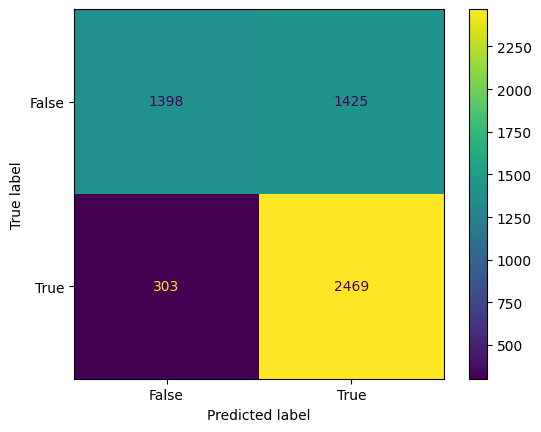

              precision    recall  f1-score   support

           0       0.82      0.50      0.62      2823
           1       0.63      0.89      0.74      2772

    accuracy                           0.69      5595
   macro avg       0.73      0.69      0.68      5595
weighted avg       0.73      0.69      0.68      5595

MAE :  0.3088471849865952
MSE :  0.3088471849865952


In [ ]:
# Model KNN dengan parameter terbaik
knn1 = KNeighborsClassifier(p= 2, n_neighbors= 1, leaf_size= 15)
knn1.fit(X_train_dtm, y_train)

y_knn1 = knn1.predict(X_test_dtm)
cm_knn1 = metrics.confusion_matrix(y_test, y_knn1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_knn1, display_labels = [False, True])

cm_display.plot()
plt.show()
plt.close()
print(classification_report(y_test, y_knn1))
print('MAE : ',mean_absolute_error(y_test, y_knn1))
print('MSE : ',mean_squared_error(y_test, y_knn1))

#Logistic Regression

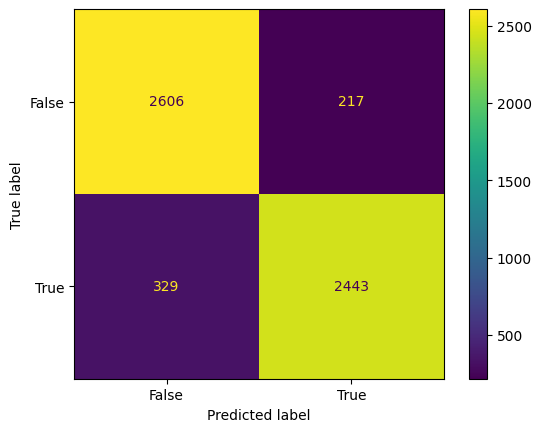

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      2823
           1       0.92      0.88      0.90      2772

    accuracy                           0.90      5595
   macro avg       0.90      0.90      0.90      5595
weighted avg       0.90      0.90      0.90      5595

MAE :  0.09758713136729223
MSE :  0.09758713136729223


In [ ]:
# Model Logistic Regression dengan parameter terbaik
lr1 = LogisticRegression(C= 1, max_iter= 100, tol= 0.001)
lr1.fit(X_train_dtm, y_train)

y_lr1 = lr1.predict(X_test_dtm)
cm_lr1 = metrics.confusion_matrix(y_test, y_lr1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_lr1, display_labels = [False, True])

cm_display.plot()
plt.show()
plt.close()

print(classification_report(y_test, y_lr1))
print('MAE : ',mean_absolute_error(y_test, y_lr1))
print('MSE : ',mean_squared_error(y_test, y_lr1))

#Visualisasi Hasil Klasifikasi

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
modelKNN = ['KNN']
modelLR = ['LR']

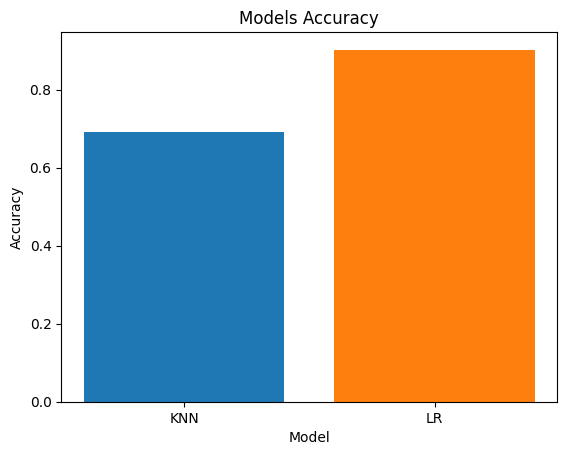

In [ ]:
# Make Accuracy Bar Graph Of Models
accKNN = [accuracy_score(y_test, y_knn1)]

accLR = [accuracy_score(y_test, y_lr1)]

plt.bar(modelKNN, accKNN)
plt.bar(modelLR, accLR)

plt.title('Models Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()
plt.close()
print()

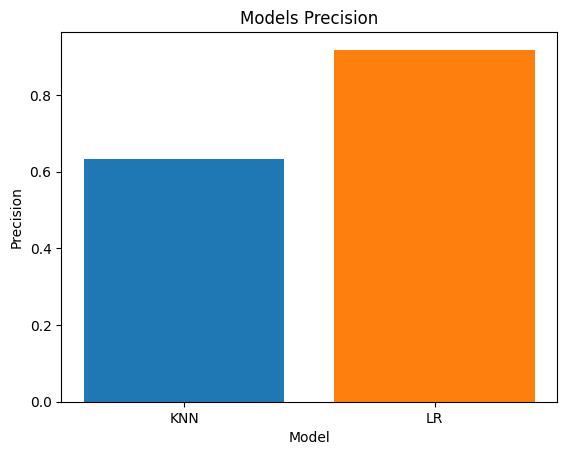

In [ ]:
# Make Precision Bar Graph Of Models
accKNN = [precision_score(y_test, y_knn1)]

accLR = [precision_score(y_test, y_lr1)]

plt.bar(modelKNN, accKNN)
plt.bar(modelLR, accLR)

plt.title('Models Precision')
plt.ylabel('Precision')
plt.xlabel('Model')
plt.show()
plt.close()
print()

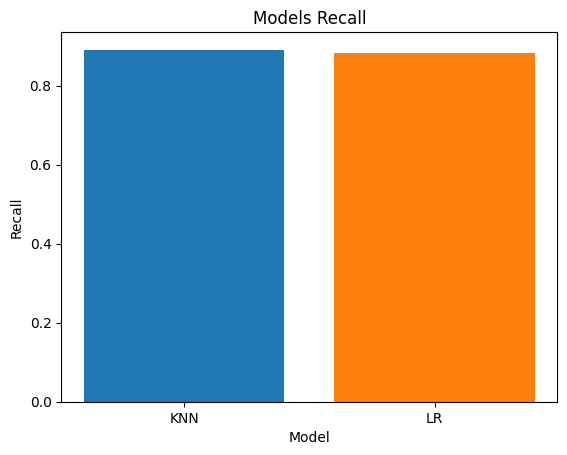

In [ ]:
# Make Recall Bar Graph Of Models
accKNN = [recall_score(y_test, y_knn1)]

accLR = [recall_score(y_test, y_lr1)]

plt.bar(modelKNN, accKNN)
plt.bar(modelLR, accLR)

plt.title('Models Recall')
plt.ylabel('Recall')
plt.xlabel('Model')
plt.show()
plt.close()
print()

#Dashboarding

In [ ]:
eda1 = {
    'cat' : dfcopy['label']
}

lbl = {
    0 : 'Not Stress',
    1 : 'Stress'
}

df_eda1 = pd.DataFrame(eda1)
df_eda1['cat'] = df_eda1['cat'].map(lbl)
df_eda1

cat
0      Not Stress
1          Stress
2      Not Stress
3          Stress
4          Stress
...           ...
27967  Not Stress
27968  Not Stress
27969      Stress
27970      Stress
27971  Not Stress

[27972 rows x 1 columns]

In [ ]:
df_eda1.to_csv('/content/drive/My Drive/Capstone3VD/eda1.csv', index=False)

In [ ]:
eda2 = {
    'word' : words,
    'freq' : freq
}

df_eda2 = pd.DataFrame(eda2)
df_eda2

In [ ]:
df_eda2.to_csv('/content/drive/My Drive/Capstone3VD/eda2.csv', index=False)

In [ ]:
df_sents.reset_index()

In [ ]:
eda3 = {
    'sents' : df_sents['Sentimen']
}

df_eda3 = pd.DataFrame(eda3)

df_eda3.to_csv('/content/drive/My Drive/Capstone3VD/eda3.csv', index=False)

In [ ]:
eda4 = {
    'model' : ['KNN', 'Logistic Regression'],
    'Akurasi' : [accuracy_score(y_test, y_knn1), accuracy_score(y_test, y_lr1)],
    'Precision' : [precision_score(y_test, y_knn1), precision_score(y_test, y_lr1)],
    'Recall' : [recall_score(y_test, y_knn1), recall_score(y_test, y_lr1)]
}

df_eda4 = pd.DataFrame(eda4)
df_eda4

In [ ]:
df_eda4.to_csv('/content/drive/My Drive/Capstone3VD/eda4.csv', index=False)

#Storytelling
link : https://docs.google.com/document/d/1Xk29QyCS-Lb-TlPC6WtvMOmoTaGDi45YWCkUOVK1EDk/edit?usp=drive_link